#### Name - Sancheet Kumar Baidya

####  Predict the percentage of an student based on the number of study hours using Linear Regression

#### What will be the predicted score if a student studies for 9.25hrs per day 

##### Importing Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline



##### Importing the dataset

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Checking for null values

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

##### Since there are no null or missing values we can visualize our dataset

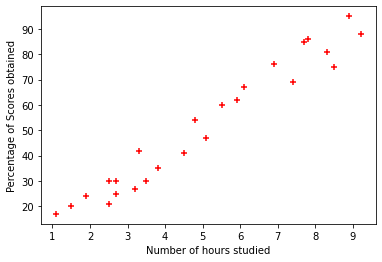

In [31]:
plt.xlabel("Number of hours studied")
plt.ylabel("Percentage of Scores obtained")
plt.scatter(df['Hours'], df['Scores'] , color="red", marker="+")
plt.show()

##### Splitting the data into train and test set

In [32]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [33]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [34]:
X_train

array([[7.7],
       [6.1],
       [7.4],
       [3.5],
       [3.2],
       [2.7],
       [9.2],
       [5.5],
       [3.8],
       [5.1],
       [2.5],
       [2.5],
       [8.9],
       [7.8],
       [6.9],
       [2.7],
       [8.3],
       [4.5],
       [5.9],
       [1.5]])

In [35]:
X_test

array([[1.1],
       [3.3],
       [1.9],
       [8.5],
       [4.8]])

In [36]:
y_train

array([85, 67, 69, 30, 27, 30, 88, 60, 35, 47, 30, 21, 95, 86, 76, 25, 81,
       41, 62, 20], dtype=int64)

In [37]:
y_test

array([17, 42, 24, 75, 54], dtype=int64)

##### Training the model

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

##### Checking the values of the coefficients

In [39]:
lr.coef_

array([10.46110829])

In [40]:
lr.intercept_

-1.5369573315500702

In [41]:
line = lr.coef_ * X + lr.intercept_

##### Visualizing the train dataset

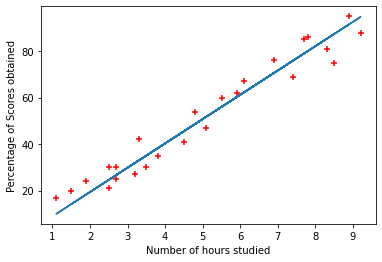

In [42]:
plt.xlabel("Number of hours studied")
plt.ylabel("Percentage of Scores obtained")
plt.scatter(df['Hours'], df['Scores'] , color="red", marker="+")
plt.plot(X , line)
plt.show()

##### Making Predictions

In [44]:
y_pred = lr.predict(X_test)
y_pred

array([ 9.97026179, 32.98470004, 18.33914843, 87.38246316, 48.67636248])

In [45]:
# Comparing Actual vs Predicted
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df2 

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


##### Visualising Test Data

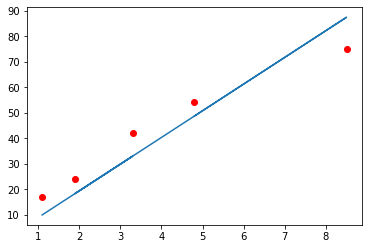

In [47]:
plt.scatter(X_test,y_test, color='red')
plt.plot(X_test,y_pred)
plt.show()

##### Predicting the score if the number of hours of study is 9.25

In [48]:
hrs = 9.25
pred = lr.predict([[9.25]])
print("The predicted score if a student studies for 9.25 hrs/ day is",pred[0])

The predicted score if a student studies for 9.25 hrs/ day is 95.22829438402952


##### Evaluating the model

In [52]:
from sklearn import metrics
mean_absolute_error = metrics.mean_absolute_error(y_test,y_pred)
print('Mean absolute error:',mean_absolute_error)

acc = lr.score(X_test, y_test)
print('Accuracy:',acc)

Mean absolute error: 7.882398086270432
Accuracy: 0.8421031525243527
